In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [8]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2056 non-null   int64  
 1   fixed acidity         2056 non-null   float64
 2   volatile acidity      2056 non-null   float64
 3   citric acid           2056 non-null   float64
 4   residual sugar        2056 non-null   float64
 5   chlorides             2056 non-null   float64
 6   free sulfur dioxide   2056 non-null   float64
 7   total sulfur dioxide  2056 non-null   float64
 8   density               2056 non-null   float64
 9   pH                    2056 non-null   float64
 10  sulphates             2056 non-null   float64
 11  alcohol               2056 non-null   float64
 12  quality               2056 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 208.9 KB


In [9]:
df.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [10]:
df1 = df.drop(['Id'],axis=1)
df1.shape

(2056, 12)

In [13]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [14]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,8.365175,0.527601,0.265058,2.398881,0.081856,16.955982,49.236868,0.996748,3.310569,0.641308,10.414972,5.720817
std,1.705390,0.173164,0.188267,0.858824,0.023729,10.009710,32.961141,0.001827,0.142321,0.137942,1.028825,0.853146
min,5.000000,0.180000,0.000000,1.200000,0.012000,1.000000,7.000000,0.990070,2.740000,0.390000,8.700000,3.000000
25%,7.200000,0.390000,0.090000,1.900000,0.071000,8.000000,22.000000,0.995600,3.200000,0.550000,9.500000,5.000000
50%,7.950000,0.520000,0.250000,2.200000,0.079000,16.000000,44.000000,0.996700,3.310000,0.610000,10.100000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,24.000000,65.000000,0.997800,3.390000,0.720000,11.000000,6.000000
max,15.900000,1.580000,0.760000,14.000000,0.414000,68.000000,289.000000,1.003690,3.780000,1.950000,14.000000,8.000000


In [15]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 12 numerical variables

The numerical variables : ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


array([[<AxesSubplot: title={'center': 'fixed acidity'}>,
        <AxesSubplot: title={'center': 'volatile acidity'}>,
        <AxesSubplot: title={'center': 'citric acid'}>],
       [<AxesSubplot: title={'center': 'residual sugar'}>,
        <AxesSubplot: title={'center': 'chlorides'}>,
        <AxesSubplot: title={'center': 'free sulfur dioxide'}>],
       [<AxesSubplot: title={'center': 'total sulfur dioxide'}>,
        <AxesSubplot: title={'center': 'density'}>,
        <AxesSubplot: title={'center': 'pH'}>],
       [<AxesSubplot: title={'center': 'sulphates'}>,
        <AxesSubplot: title={'center': 'alcohol'}>,
        <AxesSubplot: title={'center': 'quality'}>]], dtype=object)

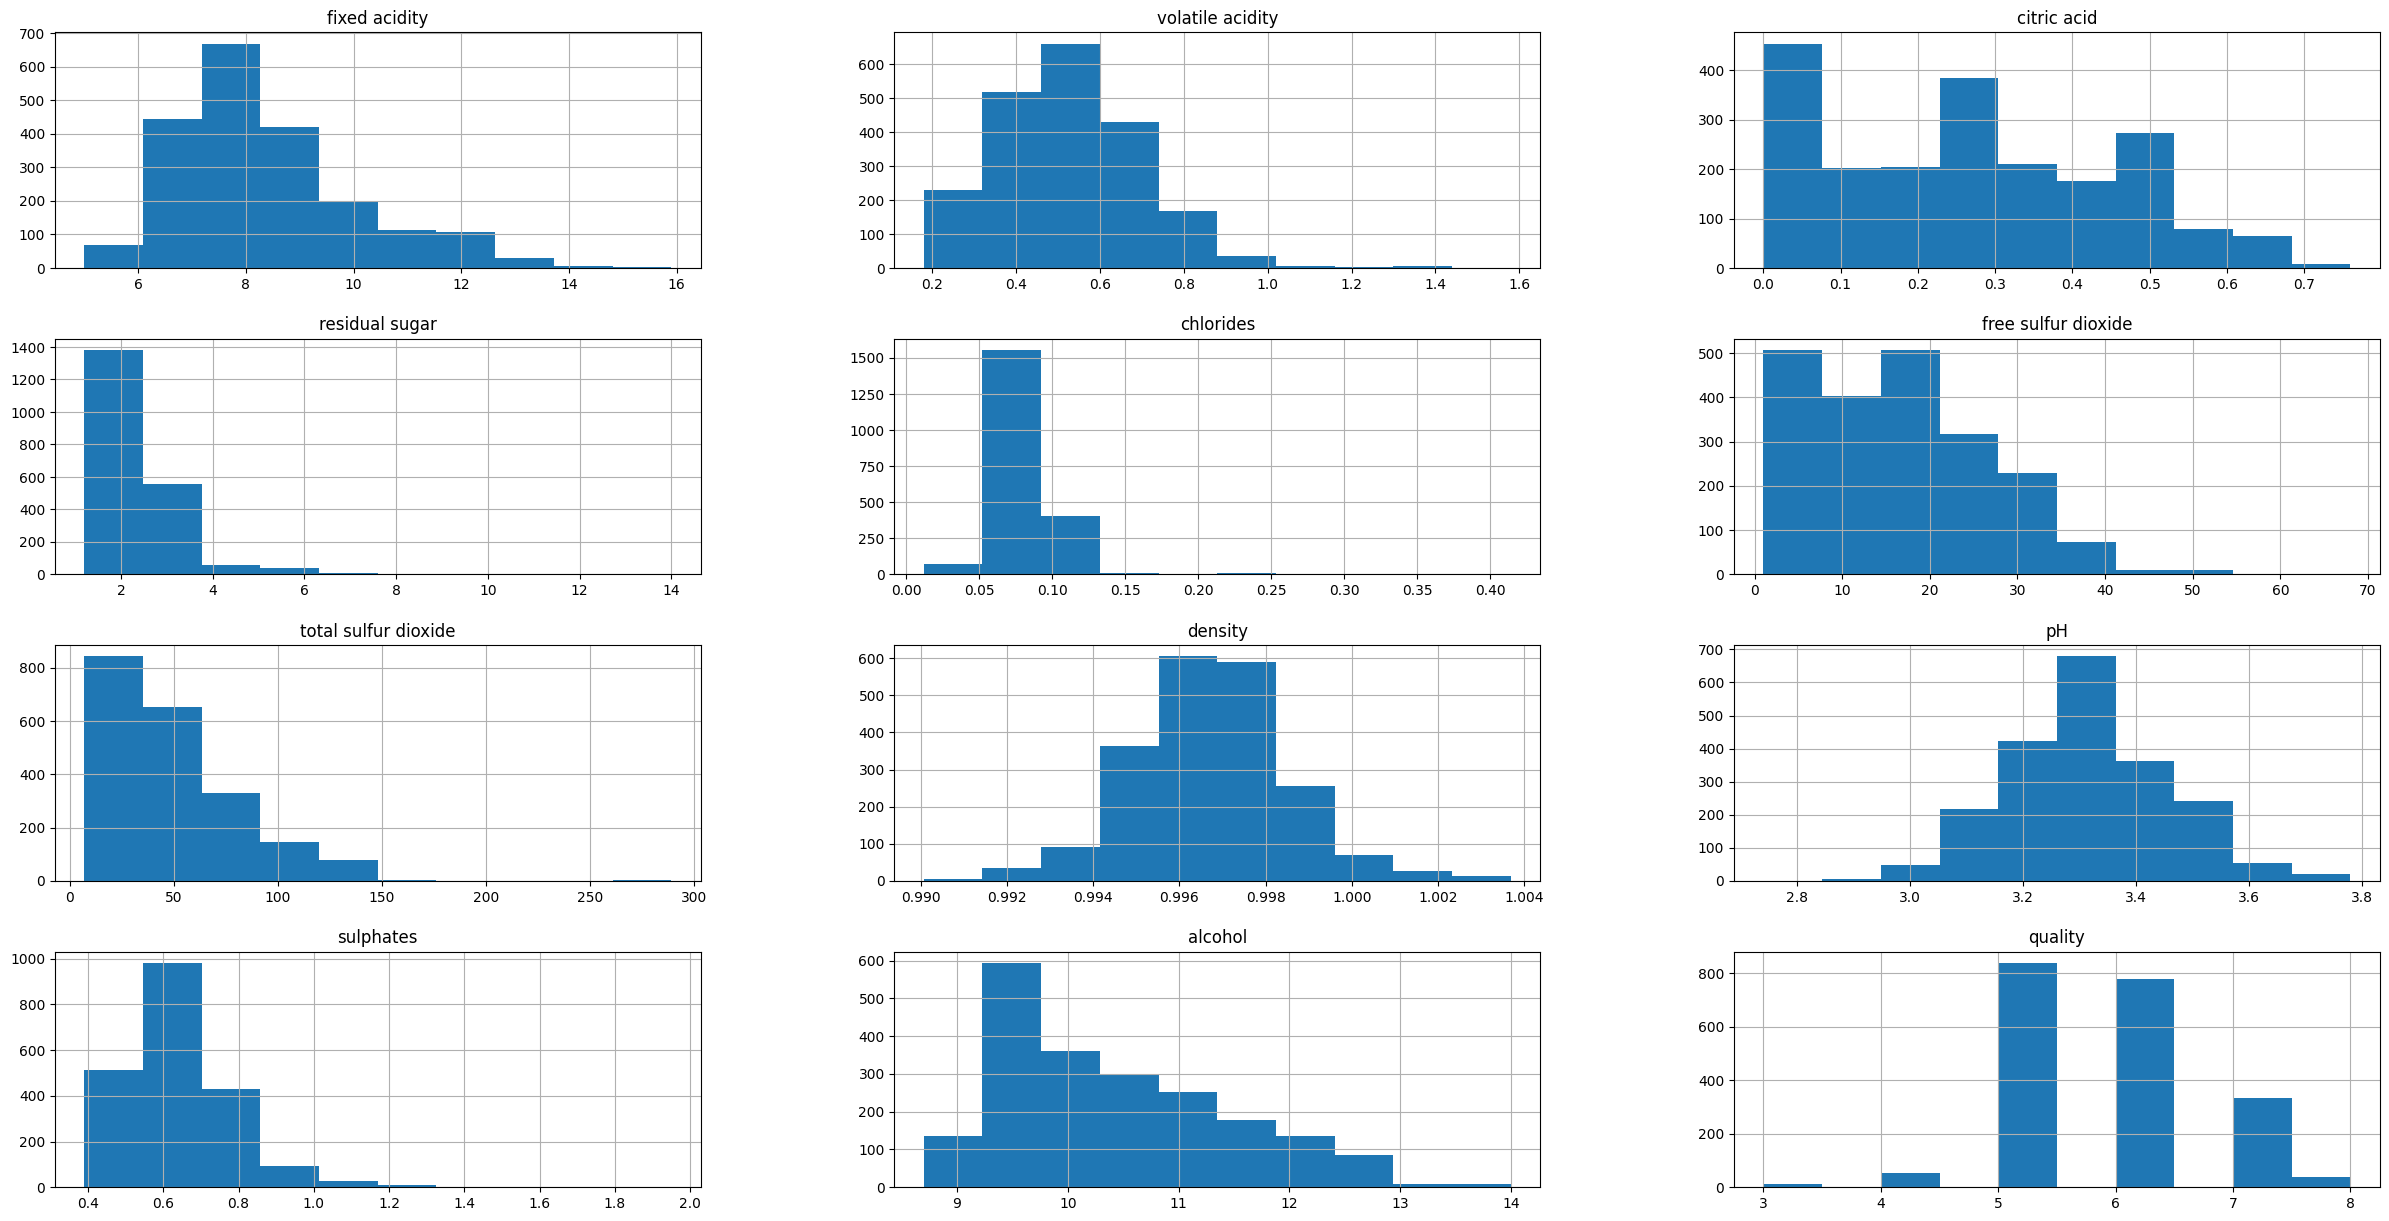

In [16]:
df1[numerical].hist(figsize=(30,15))

In [17]:
df1.quality.value_counts()

5    839
6    778
7    333
4     55
8     39
3     12
Name: quality, dtype: int64

Class imbalance exists

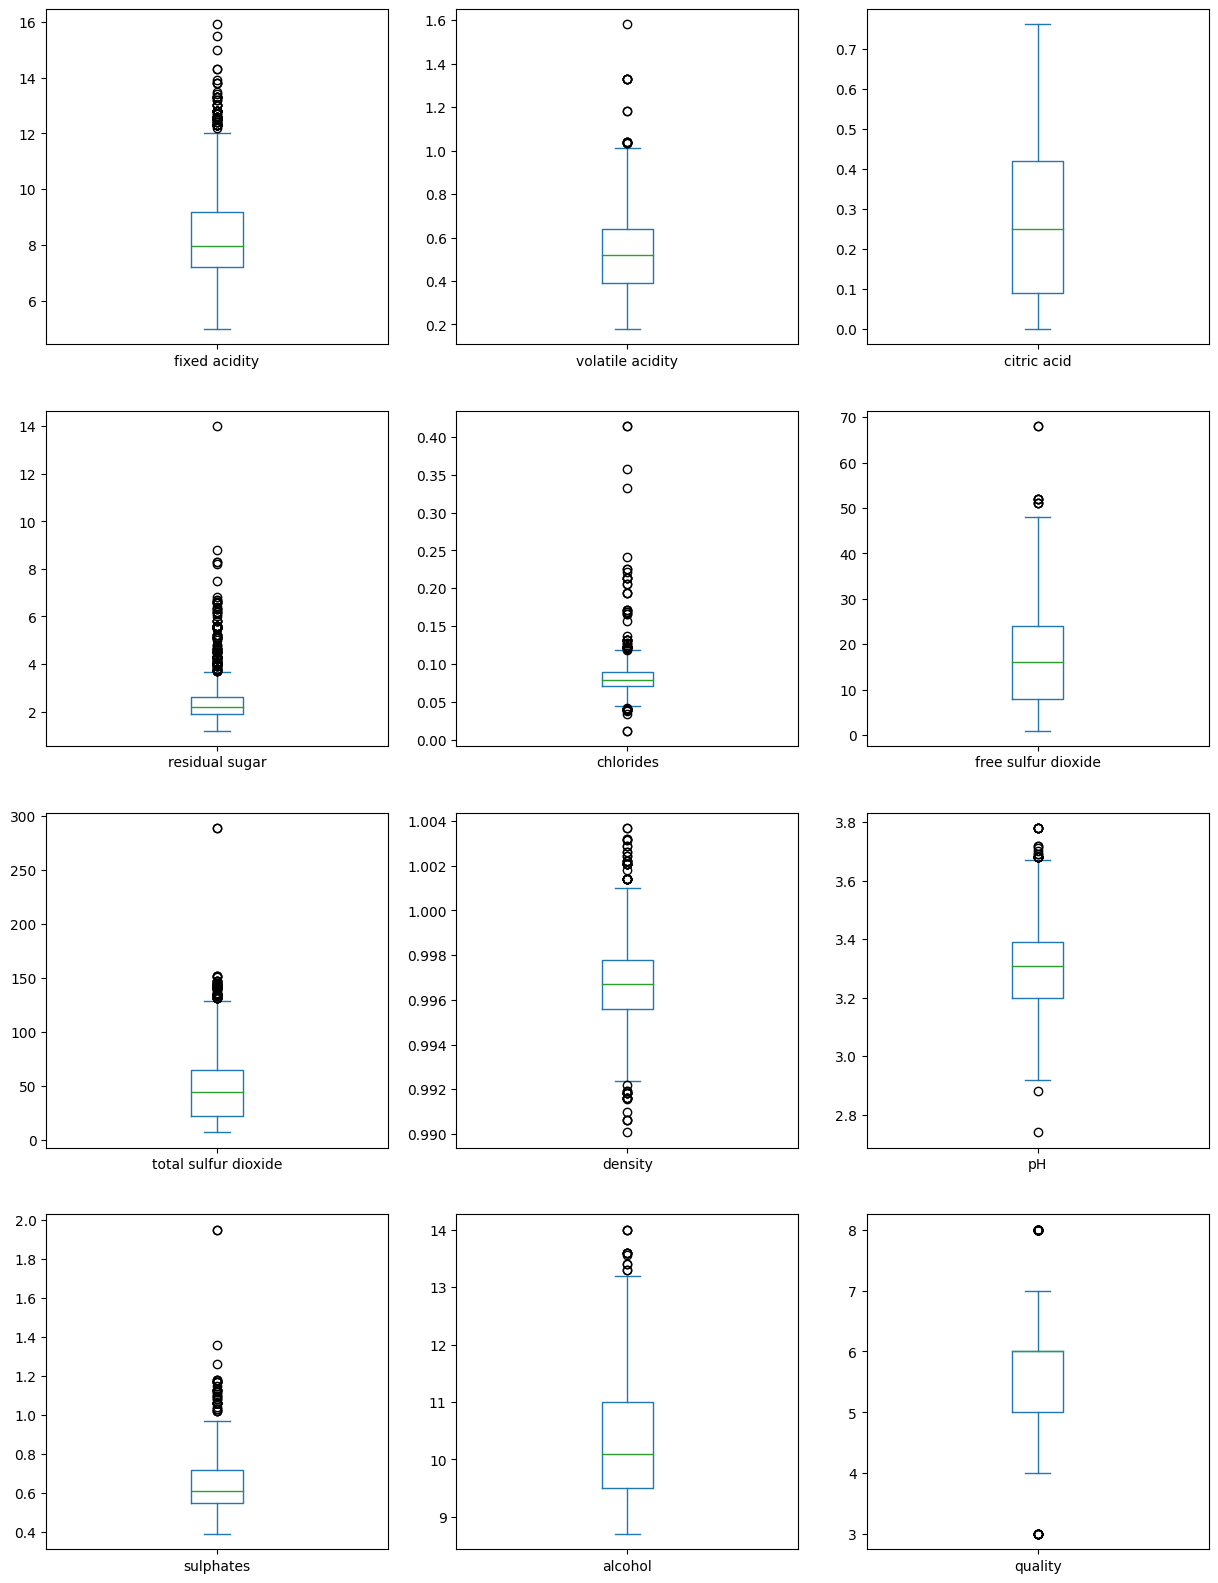

In [19]:
df1[numerical].plot(kind = "box",subplots = True,layout = (4,3),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [21]:
df1.isnull().values.any()

False

In [23]:
X = df1.drop(['quality'],axis=1)
y = df1.quality

X.shape, y.shape

((2056, 11), (2056,))

smote because there is huge imbalance

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [26]:
y.value_counts()

6    839
7    839
5    839
4    839
8    839
3    839
Name: quality, dtype: int64

In [27]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,stratify=y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4027, 11), (1007, 11), (4027,), (1007,))

In [28]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

KNN

In [29]:
from math import sqrt
print(sqrt(X_train.shape[1]))

3.3166247903554


In [30]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,10)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,verbose=10,cv=6)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Fitting 6 folds for each of 9 candidates, totalling 54 fits
[CV 1/6; 1/9] START n_neighbors=1...............................................
[CV 1/6; 1/9] END ................n_neighbors=1;, score=0.713 total time=   0.0s
[CV 2/6; 1/9] START n_neighbors=1...............................................
[CV 2/6; 1/9] END ................n_neighbors=1;, score=0.714 total time=   0.0s
[CV 3/6; 1/9] START n_neighbors=1...............................................
[CV 3/6; 1/9] END ................n_neighbors=1;, score=0.751 total time=   0.0s
[CV 4/6; 1/9] START n_neighbors=1...............................................
[CV 4/6; 1/9] END ................n_neighbors=1;, score=0.706 total time=   0.0s
[CV 5/6; 1/9] START n_neighbors=1...............................................
[CV 5/6; 1/9] END ................n_neighbors=1;, score=0.699 total time=   0.0s
[CV 6/6; 1/9] START n_neighbors=1...............................................
[CV 6/6; 1/9] END ................n_neighbors=1;,

In [31]:
print('Training set score: {:.4f}'.format(knn_cv.best_estimator_.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn_cv.best_estimator_.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7319


In [32]:
y_pred = knn_cv.predict(X_test)

In [33]:
knn_accuracy = knn_cv.score(X_test, y_test)
knn_accuracy

0.7318768619662364

In [35]:
# precision
knn_pre = precision_score(y_test, y_pred,average='weighted')
knn_pre

0.7079493769827254

In [36]:
# recall
knn_rec = recall_score(y_test, y_pred,average='weighted')
knn_rec

0.7318768619662364

In [38]:
from sklearn.metrics import cohen_kappa_score

knn_qwk = cohen_kappa_score(y_test,y_pred,weights='quadratic')
print(knn_qwk)

0.8603835486929463


Random Forests

In [39]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=12,n_estimators=10)

# fit the model
rfc.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7766


In [40]:
print('Training set score: {:.4f}'.format(rfc.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_test_RF, y_test)))

Training set score: 0.9911
Test set score: 0.7766


In [41]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc_100 = RandomForestClassifier(random_state=12,n_estimators=100)

# fit the model
rfc_100.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc_100.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.8213


In [65]:
print('Training set score: {:.4f}'.format(rfc_100.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc_100.score(X_test_RF, y_test)))

Training set score: 1.0000
Test set score: 0.8213


In [66]:
rf100_accuracy = rfc_100.score(X_test_RF, y_test)
rf100_accuracy

0.8212512413108243

In [67]:
# precision
rf100_pre = precision_score(y_test, y_pred, average='weighted')
rf100_pre

0.8115319613230432

In [68]:
# recall
rf100_rec = recall_score(y_test, y_pred, average='weighted')
rf100_rec

0.8212512413108243

In [71]:
y_pred = rfc_100.predict(X_test_RF)
rf100_qwk = cohen_kappa_score(y_test,y_pred,weights='quadratic')
print(rf100_qwk)

0.943829512401456


Gridsearch RF

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [50,75,100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestClassifier(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best params:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [54]:
y_pred = clf.predict(X_test_RF)

In [55]:
print('Training set score: {:.4f}'.format(clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test_RF, y_test)))

Training set score: 1.0000
Test set score: 0.8173


In [58]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(15,10))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

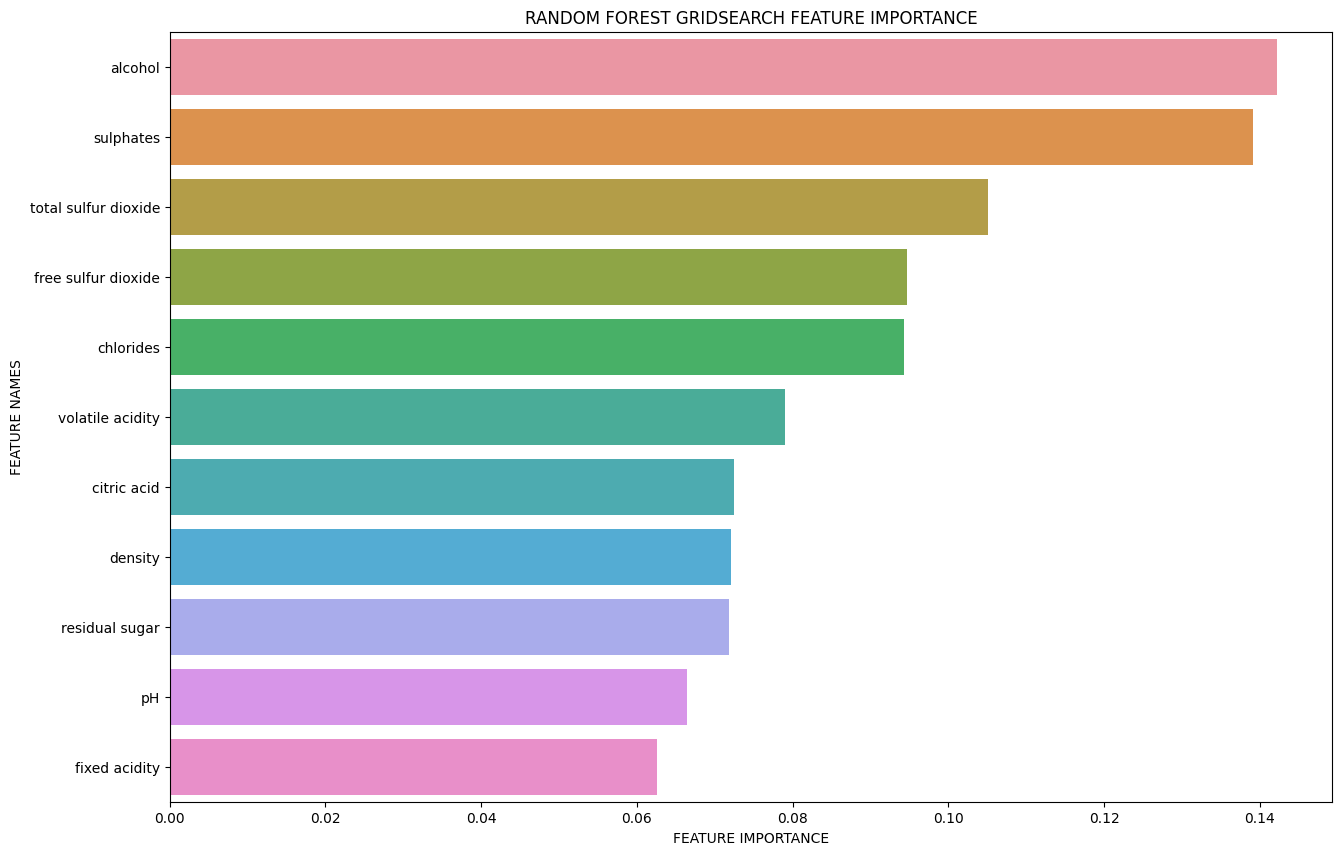

In [59]:
plot_feature_importance(clf.best_estimator_.feature_importances_,X_train_RF.columns,'RANDOM FOREST GRIDSEARCH ')

In [60]:
rfcv_accuracy = clf.score(X_test_RF, y_test)
rfcv_accuracy

0.817279046673287

In [62]:
# precision
rfcv_pre = precision_score(y_test, y_pred, average='weighted')
rfcv_pre

0.8088004331451477

In [63]:
# recall
rfcv_rec = recall_score(y_test, y_pred, average='weighted')
rfcv_rec

0.817279046673287

In [72]:
y_pred = clf.best_estimator_.predict(X_test_RF)
rfcv_qwk = cohen_kappa_score(y_test,y_pred,weights='quadratic')
print(rfcv_qwk)

0.9409859030300193


In [73]:
# creating performance dictionary
performance = {'Accuracy_Score':[ knn_accuracy, rf100_accuracy, rfcv_accuracy],
              'Precision':[ knn_pre, rf100_pre, rfcv_pre],
              'Recall': [ knn_rec, rf100_rec, rfcv_rec],
              'Quadratic weighted kappa': [knn_qwk,rf100_qwk, rfcv_qwk]}

In [74]:
performance_df = pd.DataFrame(data = performance, index= ['KNeighbors', 
                                                             'RandomForest', 'RandomForest-GridsearchCV'])

In [75]:
performance_df

,Accuracy_Score,Precision,Recall,Quadratic weighted kappa
KNeighbors,0.731877,0.707949,0.731877,0.860384
RandomForest,0.821251,0.811532,0.821251,0.943830
RandomForest-GridsearchCV,0.817279,0.808800,0.817279,0.940986


On test data

In [76]:
test_df = pd.read_csv('test.csv')
test_df.shape

(1372, 12)

In [78]:
test_df1 = test_df.drop(['Id'],axis=1)
test_df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
1,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0
2,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5
3,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7
4,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,3.23,0.48,12.8


In [83]:
sample = pd.read_csv('sample_submission.csv')
sample.head(5)

,Id,quality
0,2056,5
1,2057,5
2,2058,5
3,2059,5
4,2060,5


In [98]:
y_pred_test = knn_cv.predict(test_df1)

In [99]:
y_pred_test

array([6, 7, 4, ..., 4, 5, 5], dtype=int64)

In [100]:
submissions = pd.DataFrame(data={'Id':sample.Id, 'quality':y_pred_test})
submissions.head()

,Id,quality
0,2056,6
1,2057,7
2,2058,4
3,2059,8
4,2060,7


In [101]:
submissions.to_csv('knncv_preds.csv',index=False)

In [102]:
test_df1_RF = scaler.fit_transform(test_df1)

test_df1_RF = pd.DataFrame(test_df1_RF,columns=cols)

In [103]:
y_pred_test = clf.best_estimator_.predict(test_df1_RF)

In [104]:
submissions = pd.DataFrame(data={'Id':sample.Id, 'quality':y_pred_test})
submissions.head()

,Id,quality
0,2056,5
1,2057,7
2,2058,4
3,2059,8
4,2060,5


In [105]:
submissions.to_csv('RFCV_preds.csv',index=False)

In [106]:
y_pred_test = rfc_100.predict(test_df1_RF)

In [107]:
y_pred_test

array([5, 7, 5, ..., 5, 5, 5], dtype=int64)

In [108]:
submissions = pd.DataFrame(data={'Id':sample.Id, 'quality':y_pred_test})
submissions.head()

,Id,quality
0,2056,5
1,2057,7
2,2058,5
3,2059,6
4,2060,5


In [109]:
submissions.to_csv('RF100_preds.csv',index=False)